<img src="../../../images/banners/sklearn.png" width="500"/>

<a class="anchor" id="intro_to_data_structures"></a>
# <img src="../../../images/logos/sklearn.png" width="40"/> An introduction to machine learning with scikit-learn

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 

* [Machine learning: the problem setting](#machine_learning:_the_problem_setting)
* [Loading an example dataset](#loading_an_example_dataset)
* [Learning and predicting](#learning_and_predicting)
* [Conventions](#conventions)
    * [Type casting](#type_casting)
    * [Refitting and updating parameters](#refitting_and_updating_parameters)
    * [Multiclass vs. multilabel fitting](#multiclass_vs._multilabel_fitting)
* [FAQ](#faq)
---

scikit-learn was initially developed by David Cournapeau as a Google Summer of Code project in 2007. Later that year, Matthieu Brucher joined the project and started to use it as a part of his thesis work. In 2010, [INRIA](https://en.wikipedia.org/wiki/French_Institute_for_Research_in_Computer_Science_and_Automation), the French Institute for Research in Computer Science and Automation, got involved and the first public release (v0.1 beta) was published in late January 2010.

Now, `Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

## Installing scikit-learn

There are different ways to install scikit-learn. Read [sklearn official documentation](https://scikit-learn.org/stable/install.html) to learn more.

With `pip`:

```bash
pip install -U scikit-learn
```

With `conda`:

```bash
$ conda create -n sklearn-env -c conda-forge scikit-learn
$ conda activate sklearn-env
```

<a class="anchor" id="machine_learning:_the_problem_setting"></a>
## Machine learning: the problem setting

In general, a learning problem considers a set of n
[samples](https://en.wikipedia.org/wiki/Sample_(statistics)) of
data and then tries to predict properties of unknown data. If each sample is
more than a single number and, for instance, a multi-dimensional entry
(aka [multivariate](https://en.wikipedia.org/wiki/Multivariate_random_variable)
data), it is said to have several attributes or **features**.

Learning problems fall into a few categories:

- [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning), in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:
    - [Classification](https://en.wikipedia.org/wiki/Classification_in_machine_learning): samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
    - [Regression](https://en.wikipedia.org/wiki/Regression_analysis): if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

**Training set and testing set**

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

<img src="../images/kfold.png" width="600"/>

<a class="anchor" id="loading_an_example_dataset"></a>
## Loading an example dataset

`scikit-learn` comes with a few standard datasets, for instance the
[iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [digits](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
datasets for classification and the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) for regression.

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some
metadata about the data. This data is stored in the `.data` member,
which is a `n_samples, n_features` array. In the case of supervised
problems, one or more response variables are stored in the `.target` member. More
details on the different datasets can be found in the [dedicated
section](https://scikit-learn.org/stable/datasets.html#datasets).

For instance, in the case of the digits dataset, `digits.data` gives
access to the features that can be used to classify the digits samples:

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

and `digits.target` gives the ground truth for the digit dataset, that
is the number corresponding to each digit image that we are trying to
learn:

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

**Shape of the data arrays**

The data is always a 2D array, shape `(n_samples, n_features)`, although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape `(8, 8)` and can be accessed using:

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**Loading from external datasets**

To load from an external dataset, please refer to [loading external datasets](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#external-datasets).

<a class="anchor" id="learning_and_predicting"></a>
## Learning and predicting

In the case of the digits dataset, the task is to predict, given an image,
which digit it represents. We are given samples of each of the 10
possible classes (the digits zero through nine) on which we *fit* an
[estimator](https://en.wikipedia.org/wiki/Estimator) to be able to *predict*
the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that
implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC`, which
implements [support vector classification](https://en.wikipedia.org/wiki/Support_vector_machine). The
estimator’s constructor takes as arguments the model’s parameters.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

For now, we will consider the estimator as a black box:

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

**Choosing the parameters of the model**

In this example, we set the value of gamma manually. To find good values for these parameters, we can use tools such as [grid search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) and [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

The `clf` (for classifier) estimator instance is first
fitted to the model; that is, it must *learn* from the model. This is
done by passing our training set to the `fit` method. For the training
set, we’ll use all the images from our dataset, except for the last
image, which we’ll reserve for our predicting. We select the training set with
the `[:-1]` Python syntax, which produces a new array that contains all but
the last item from `digits.data`:

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

Now you can *predict* new values. In this case, you’ll predict using the last
image from `digits.data`. By predicting, you’ll determine the image from the
training set that best matches the last image.

In [10]:
clf.predict(digits.data[-4:])

array([0, 8, 9, 8])

The corresponding image is:

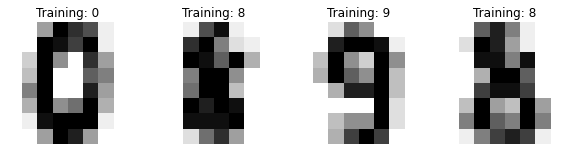

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[-4:], digits.target[-4:]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

As you can see, it is a challenging task: after all, the images are of poor
resolution. Do you agree with the classifier?

A complete example of this classification problem is available as an
example that you can run and study:
[Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py).

<a class="anchor" id="conventions"></a>
## Conventions

scikit-learn estimators follow certain rules to make their behavior more
predictive. These are described in more detail in the [Glossary of Common Terms and API Elements](https://scikit-learn.org/stable/glossary.html#glossary).

<a class="anchor" id="faq"></a>
## FAQ

> **Why is there no support for deep or reinforcement learning / Will there be support for deep or reinforcement learning in scikit-learn?**

Deep learning and reinforcement learning both require a rich vocabulary to
define an architecture, with deep learning additionally requiring
GPUs for efficient computing. However, neither of these fit within
the design constraints of scikit-learn; as a result, deep learning
and reinforcement learning are currently out of scope for what
scikit-learn seeks to achieve.

You can find more information about addition of gpu support at
[Will you add GPU support?](https://scikit-learn.org/stable/#will-you-add-gpu-support).

Note that scikit-learn currently implements a simple multilayer perceptron
in [`sklearn.neural_network`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network "sklearn.neural_network"). We will only accept bug fixes for this module.
If you want to implement more complex deep learning models, please turn to
popular deep learning frameworks such as
[tensorflow](https://www.tensorflow.org/),
[keras](https://keras.io/)
and [pytorch](https://pytorch.org/).

> **Will you add GPU support?**

No, or at least not in the near future. The main reason is that GPU support will introduce many software dependencies and introduce platform specific issues. scikit-learn is designed to be easy to install on a wide variety of platforms. Outside of neural networks, GPUs don’t play a large role in machine learning today, and much larger gains in speed can often be achieved by a careful choice of algorithms.

> **Why does Scikit-learn not directly work with, for example, pandas.DataFrame?**

The homogeneous NumPy and SciPy data objects currently expected are most
efficient to process for most operations. Extensive work would also be needed
to support Pandas categorical types. Restricting input to homogeneous
types therefore reduces maintenance cost and encourages usage of efficient
data structures.

Note however that [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer "sklearn.compose.ColumnTransformer") makes it
convenient to handle heterogeneous pandas dataframes by mapping homogeneous subsets of
dataframe columns selected by name or dtype to dedicated scikit-learn transformers.

Therefore [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer "sklearn.compose.ColumnTransformer") are often used in the first
step of scikit-learn pipelines when dealing
with heterogeneous dataframes (see [Pipeline: chaining estimators](https://scikit-learn.org/stable/modules/compose.html#pipeline) for more details).

See also [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)
for an example of working with heterogeneous (e.g. categorical and numeric) data.